#### Necessary Library

In [1]:
!pip install pygsheets
!pip install --upgrade -q pygsheets

     |████████████████████████████████| 112kB 2.7MB/s 


In [2]:
!pip install clean-text[gpl]

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 245kB 8.0MB/s 
  Created wheel for ftfy: filename=ftfy-5.7-cp36-none-any.whl size=44593 sha256=ef71fbbb4312b9a13f59088e290110fcd92b8c9d46facdda07176a4e3a9f6404
  Stored in directory: /root/.cache/pip/wheels/8e/da/59/6c8925d571aacade638a0f515960c21c0887af1bfe31908fbf
Successfully built ftfy


In [3]:
import pygsheets
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# import the necessary library
import pandas as pd
import numpy as np 
import os
import json
import glob
from pandas.io.json import json_normalize

from datetime import datetime
import re
import string
from pprint import pprint
from cleantext import clean

# NLTK
from nltk.tokenize import RegexpTokenizer  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser # for bigrams, trigrams

import warnings
warnings.filterwarnings('ignore')

In [0]:
pd.options.display.max_columns = 400 # this will set limit of columns to 500
pd.options.display.max_rows = 400 # this will set limit of columns to 500

# pd.options.display.max_colwidth
pd.options.display.max_colwidth = 100
# pd.options.display.max_colwidth = 200

### Authentification Google


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Authentification with google drive and colab
from google.colab import auth
auth.authenticate_user()

# Read google sheet
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
root_path = 'drive/My Drive/Personal Projects/2020/Sport_CASA/sport/data/'  

In [0]:
project_id = 'nature-casa'
!gcloud config set project {project_id}

### Step 1 - Data Preparation

#### Read AllData 

In [0]:
import json
from json import loads

In [0]:
def Get_Tweets_Dataframe(data_hashtag):

  # define the file_path to the tweets folder 
  file_path = 'twitter/json/'

  # create an empty list to store all jsonline data
  df_alldata = []
  
  with open(root_path+file_path+data_hashtag,'r') as myfile:
    ## loop through all the line of the json 
    for line in myfile:
      json_nesteddata = json.loads(line)
      json_dataclean = json_normalize(json_nesteddata)
      df_alldata.append(json_dataclean)
  
  # concat the list into a DataFrame! 
  df = pd.concat(df_alldata) 
  return df

In [72]:
data_h1 = Get_Tweets_Dataframe('lausanne2020.json')
data_h2 = Get_Tweets_Dataframe('youtholympicgames.json')
data_h3 = Get_Tweets_Dataframe('youtholympics.json')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


##### Append data_hs & Delete Duplicates

In [0]:
df_list = [data_h1,data_h2]
data = data_h3.append(df_list)
data = data.reset_index(drop=True)

In [94]:
print('Number of Tweets: '+str(len(data)))
data = data.drop_duplicates(['username','tweet'])
print('Number of Tweets: '+str(len(data)))

Number of Tweets: 14417
Number of Tweets: 12196


In [84]:
data.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1255052053765898240,1255052053765898240,1588062702000,2020-04-28,09:31:42,BST,91189330,youtholympics,Youth Olympic Games,,"Don’t miss this Instagram live with Youth Olympian, Young Ambassador and Olympics medalist @jess...",[jessfoxcanoe],[https://twitter.com/olympicchannel/status/1255048932733878272],[],0,0,3,[],[],https://twitter.com/youtholympics/status/1255052053765898240,False,https://twitter.com/olympicchannel/status/1255048932733878272,0,,,,,,,"[{'user_id': '91189330', 'username': 'youtholympics'}, {'user_id': '577843136', 'username': 'jes...",,,,
1,1255048932733878272,1255048932733878272,1588061957000,2020-04-28,09:19:17,BST,3163717636,olympicchannel,Olympic Channel,,📞 Incoming Call for Jessica Fox 📞\n\nJoin us on Instagram live today at 7pm AEST with the Austra...,"[youtholympics, ausolympicteam, jessfoxcanoe]",[],[https://pbs.twimg.com/media/EWrUWjFXgAA4VEN.jpg],0,1,11,[],[],https://twitter.com/olympicchannel/status/1255048932733878272,False,,0,,,,,,,"[{'user_id': '3163717636', 'username': 'olympicchannel'}, {'user_id': '91189330', 'username': 'y...",,,,


#### Data Cleaning

In [85]:
data.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1255052053765898240,1255052053765898240,1588062702000,2020-04-28,09:31:42,BST,91189330,youtholympics,Youth Olympic Games,,"Don’t miss this Instagram live with Youth Olympian, Young Ambassador and Olympics medalist @jess...",[jessfoxcanoe],[https://twitter.com/olympicchannel/status/1255048932733878272],[],0,0,3,[],[],https://twitter.com/youtholympics/status/1255052053765898240,False,https://twitter.com/olympicchannel/status/1255048932733878272,0,,,,,,,"[{'user_id': '91189330', 'username': 'youtholympics'}, {'user_id': '577843136', 'username': 'jes...",,,,


In [0]:
# Create a column for retweets RT
data['RT'] = np.where(data['tweet'].str.contains('RT'), '1', '0')

In [132]:
# Get the shape
print('Number of Single Tweet: ' +str(data.shape))

Number of Single Tweet: (12196, 48)


In [0]:
## Look at NAN Values
data.isnull().sum()

#### Time and Date Formating

In [98]:
data.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second
0,1255052053765898240,1255052053765898240,1588062702000,2020-04-28,2020-04-28 09:31:42,BST,91189330,youtholympics,Youth Olympic Games,,"Don’t miss this Instagram live with Youth Olympian, Young Ambassador and Olympics medalist @jess...",[jessfoxcanoe],[https://twitter.com/olympicchannel/status/1255048932733878272],[],0,0,3,[],[],https://twitter.com/youtholympics/status/1255052053765898240,False,https://twitter.com/olympicchannel/status/1255048932733878272,0,,,,,,,"[{'user_id': '91189330', 'username': 'youtholympics'}, {'user_id': '577843136', 'username': 'jes...",,,,,0,2020,4,28,9,31,42


In [0]:
data['time'] = data['date'] + " " + data['time']

# Format to datetime
data['time'] = pd.to_datetime(data['time'])

# Split into year, month, day, hour, second
data['year'] = data['time'].apply(lambda x: x.year)
data['month'] = data['time'].apply(lambda x: x.month)
data['day'] = data['time'].apply(lambda x: x.day)
data['hour'] = data['time'].apply(lambda x: x.hour)
data['minute'] = data['time'].apply(lambda x: x.minute)
data['second'] = data['time'].apply(lambda x: x.second)

##### Filter Data Time
- Keep only data from the month of January

In [104]:
data.month.unique()

array([4, 3, 2, 1])

In [0]:
data_selc = data[data['month']==1]

In [107]:
print("Number tweets for January: "+str(len(data_selc)))
data_selc.head(1)

Number tweets for January: 11548


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second
391,1223334179439550465,1223334179439550465,1580500571000,2020-01-31,2020-01-31 19:56:11,BST,596401466,sportfisioswiss,Sportfisio Swiss,,🇨🇭👏 @SuzanneGard special blog https://m.facebook.com/sportfisioswiss/ … ⛷🏂 ⛸🥌🏒@lausanne2020 @yo...,"[suzannegard, lausanne2020, youtholympics, intfspt]",[https://m.facebook.com/sportfisioswiss/],"[https://pbs.twimg.com/media/EPon7nMWkAU_0Ap.jpg, https://pbs.twimg.com/media/EPon7nPWoAIPFlQ.jpg]",0,3,11,[#sportphysio],[],https://twitter.com/SportfisioSwiss/status/1223334179439550465,False,,0,,,,,,,"[{'user_id': '596401466', 'username': 'SportfisioSwiss'}, {'user_id': '213217886', 'username': '...",,,,,0,2020,1,31,19,56,11


##### Save Data Google Bucket

In [108]:
# save the data into google bucket!
data_selc.to_csv('lausanne2020_twitterdata_january.csv')
!gsutil cp  'lausanne2020_twitterdata_january.csv' gs://nature-london/lausanne2020_twitterdata_january.csv

Copying file://lausanne2020_twitterdata_january.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/8.2 MiB.                                      


In [103]:
# save the data into google bucket!
data.to_csv('lausanne2020_twitterdata.csv')
!gsutil cp  'lausanne2020_twitterdata.csv' gs://nature-london/lausanne2020_twitterdata.csv

Copying file://lausanne2020_twitterdata.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/8.8 MiB.                                      


#### Textual Data Cleaning

In [0]:
# Import stopwords with nltk.
stop = stopwords.words('english')
other = ['rt','amp','im','na','wan','ive','u','youre']
remove = stop + other
lemmatizer = WordNetLemmatizer()
data['tweet'] = data['tweet'].astype(str)

def Get_CleanText(df):

  # remove 'http' links and remove all '\n' line-breaks
  df['clean_text'] = df.tweet.str.replace(r'http\S+','')
  df['clean_text'] = df.clean_text.str.replace(r'http','')
  df['text_sentiment'] = df.clean_text.str.replace(r'\n','')
  df['clean_text'] = df.clean_text.str.replace(r'\n','')
  
  #remove 'non-ascii' characters
  df['clean_text'] = df.clean_text.str.replace(r'[^\x00-\x7F]','')

  #make all the text lowercase
  df['clean_text'] = df.clean_text.str.lower()
    
  #create a column for all #hasthtags that appears in the text
  df['hashtags'] = df.tweet.str.findall(r'#\S+')
    
  #clean the text by removing all punctuation
  df['clean_text'] = df['clean_text'].apply(
        lambda x: clean(x, no_punct=True, no_currency_symbols=True, no_numbers=True, 
        replace_with_number="",replace_with_currency_symbol=""))
    
  #tokenise all of the clean text
  df['token_text'] = df.clean_text.apply(word_tokenize)
    
  #count the number of words in the post
  df['token_count'] = df.token_text.apply(len)
    
  # Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
  df['noStopWords'] = df['clean_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (remove)]))
    
  #tokenise all of the text with Stop words
  df['token_textnoStop'] = df.noStopWords.apply(word_tokenize)

  #lemmatize
  #df_list['token_textnoStop'] = df['token_textnoStop'].apply(
  #      lambda x: ' '.join([word for word in x if word not in (remove)]))
  # df['token_textnoStop'] = df.token_textnoStop.apply(word_tokenize)
  df['lemmatized'] = df['token_textnoStop'].apply(lambda lem: [lemmatizer.lemmatize(w) for w in lem]) 
  
  return df

In [0]:
data_clean = Get_CleanText(data)
dataselc_clean = Get_CleanText(data_selc)

In [139]:
### Remove duplicates tweets ! 
print('Number of Tweets (with retweets): '+str(len(dataselc_clean)))
data_nort = dataselc_clean.drop_duplicates('clean_text')
print('Number of Tweets (without retweets): '+str(len(data_nort)))

Number of Tweets (with retweets): 11548
Number of Tweets (without retweets): 10227


In [0]:
## df_clean = df[['time','username','name','mentions','hashtags','RT','replies_count', 'retweets_count', 'likes_count', 'year',
##        'month', 'day', 'hour', 'minute', 'second', 'tweet','clean_text','text_sentiment', 'token_text',
##        'token_count', 'noStopWords','token_textnoStop','lemmatized','id', 'conversation_id', 'created_at','cashtags', 'link','urls',
##        'photos', 'retweet', 'quote_url', 'video', 'near', 'geo','place','source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

In [140]:
data_nort.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized
391,1223334179439550465,1223334179439550465,1580500571000,2020-01-31,2020-01-31 19:56:11,BST,596401466,sportfisioswiss,Sportfisio Swiss,,🇨🇭👏 @SuzanneGard special blog https://m.facebook.com/sportfisioswiss/ … ⛷🏂 ⛸🥌🏒@lausanne2020 @yo...,"[suzannegard, lausanne2020, youtholympics, intfspt]",[https://m.facebook.com/sportfisioswiss/],"[https://pbs.twimg.com/media/EPon7nMWkAU_0Ap.jpg, https://pbs.twimg.com/media/EPon7nPWoAIPFlQ.jpg]",0,3,11,[#sportphysio],[],https://twitter.com/SportfisioSwiss/status/1223334179439550465,False,,0,,,,,,,"[{'user_id': '596401466', 'username': 'SportfisioSwiss'}, {'user_id': '213217886', 'username': '...",,,,,0,2020,1,31,19,56,11,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,🇨🇭👏 @SuzanneGard special blog … ⛷🏂 ⛸🥌🏒@lausanne2020 @youtholympics 💪 #sportphysio @IntFSPT pic...,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...",8,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...","[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif..."


In [0]:
data_nort.to_csv(root_path+'twitterdata_january.csv')

In [142]:
# save the data into google bucket!
data_nort.to_csv('lausanne2020_twitterdata_january_clean.csv')
!gsutil cp  'lausanne2020_twitterdata_january_clean.csv' gs://nature-london/lausanne2020_twitterdata_january_clean.csv

Copying file://lausanne2020_twitterdata_january_clean.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/16.3 MiB.                                     


### Step 2 - Top Hashtags, Top Words

In [144]:
data_nort.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized
391,1223334179439550465,1223334179439550465,1580500571000,2020-01-31,2020-01-31 19:56:11,BST,596401466,sportfisioswiss,Sportfisio Swiss,,🇨🇭👏 @SuzanneGard special blog https://m.facebook.com/sportfisioswiss/ … ⛷🏂 ⛸🥌🏒@lausanne2020 @yo...,"[suzannegard, lausanne2020, youtholympics, intfspt]",[https://m.facebook.com/sportfisioswiss/],"[https://pbs.twimg.com/media/EPon7nMWkAU_0Ap.jpg, https://pbs.twimg.com/media/EPon7nPWoAIPFlQ.jpg]",0,3,11,[#sportphysio],[],https://twitter.com/SportfisioSwiss/status/1223334179439550465,False,,0,,,,,,,"[{'user_id': '596401466', 'username': 'SportfisioSwiss'}, {'user_id': '213217886', 'username': '...",,,,,0,2020,1,31,19,56,11,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,🇨🇭👏 @SuzanneGard special blog … ⛷🏂 ⛸🥌🏒@lausanne2020 @youtholympics 💪 #sportphysio @IntFSPT pic...,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...",8,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...","[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif..."
392,1223241374323159041,1223030129397587979,1580478445000,2020-01-31,2020-01-31 13:47:25,BST,492734755,sandycairns,Sandy Cairns,,Community Proud !,"[gravenhursths, muskokaregion, gateway2muskoka, youtholympics]",[],[],0,0,3,[],[],https://twitter.com/sandycairns/status/1223241374323159041,False,,0,,,,,,,"[{'user_id': '492734755', 'username': 'sandycairns'}, {'user_id': '3600734776', 'username': 'Gra...",,,,,0,2020,1,31,13,47,25,community proud,Community Proud !,"[community, proud]",2,community proud,"[community, proud]","[community, proud]"


#### Top 10 Tweeters

In [145]:
top_user = pd.DataFrame(data_nort['name'].value_counts()).reset_index()
top_user = top_user.rename(columns={'index':'user','name':'nb_tweets'})
top_user.head(10)

,user,nb_tweets
0,Lausanne 2020 ❄️ Winter Youth Olympic Games 🥇🥈🥉,517
1,Olympic Channel,262
2,Devin Heroux,210
3,IOC MEDIA,183
4,Youth Olympic Games,176
5,insidethegames,143
6,Olympic Information Service,131
7,France Olympique,104
8,Экологическая технореволюция и реиндустриализация,98
9,IIHF,96


### Semantic Analysis

#### Top Words and Hashtags

In [147]:
data_nort.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized
391,1223334179439550465,1223334179439550465,1580500571000,2020-01-31,2020-01-31 19:56:11,BST,596401466,sportfisioswiss,Sportfisio Swiss,,🇨🇭👏 @SuzanneGard special blog https://m.facebook.com/sportfisioswiss/ … ⛷🏂 ⛸🥌🏒@lausanne2020 @yo...,"[suzannegard, lausanne2020, youtholympics, intfspt]",[https://m.facebook.com/sportfisioswiss/],"[https://pbs.twimg.com/media/EPon7nMWkAU_0Ap.jpg, https://pbs.twimg.com/media/EPon7nPWoAIPFlQ.jpg]",0,3,11,[#sportphysio],[],https://twitter.com/SportfisioSwiss/status/1223334179439550465,False,,0,,,,,,,"[{'user_id': '596401466', 'username': 'SportfisioSwiss'}, {'user_id': '213217886', 'username': '...",,,,,0,2020,1,31,19,56,11,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,🇨🇭👏 @SuzanneGard special blog … ⛷🏂 ⛸🥌🏒@lausanne2020 @youtholympics 💪 #sportphysio @IntFSPT pic...,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...",8,suzannegard special blog lausanne2020 youtholympics sportphysio intfspt pictwittercomgifc2vnpwk,"[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif...","[suzannegard, special, blog, lausanne2020, youtholympics, sportphysio, intfspt, pictwittercomgif..."


In [148]:
#flatten list of lists of no stop words (TextnoStop) into one large list
tokens = []

for sublist in data_nort.token_textnoStop:
    for word in sublist:
        tokens.append(word)
        
tokens_df = pd.DataFrame(tokens)
tokens_df.columns = ['words']
tokens_df['freq_words'] = tokens_df.groupby('words')['words'].transform('count')

print(tokens_df.shape)

(148514, 2)


In [149]:
# Drop duplicates and sort by most common words
tokens_df = tokens_df.drop_duplicates(subset=['words', 'freq_words'])
tokens_df = tokens_df.sort_values(by='freq_words', ascending=False)

#orfc_word_count = orfc_tokens_df.head(20)
tokens_df.words.unique()

array(['lausanne2020', 'de', 'youtholympics', ..., 'halt',
       'pictwittercomobuula9lys', 'pictwittercomzrbsh2nfho'], dtype=object)

In [150]:
hashtags = []

for sublist in data_nort.hashtags:
    for word in sublist:
        hashtags.append(word)
        
hashtags_df = pd.DataFrame(hashtags)
hashtags_df.columns = ['words']

# Lowercase
hashtags_df['words'] = hashtags_df.words.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
hashtags_df['words'] = hashtags_df.words.str.lower()

hashtags_df['freq_hastags'] = hashtags_df.groupby('words')['words'].transform('count')
hashtags_df.shape

(17742, 2)

In [151]:
hashtags_df = hashtags_df.drop_duplicates(subset=['words', 'freq_hastags'])
#hashtags_df = hashtags_df.sort_values(by='freq_hastags', ascending=False).head(100)
hashtags_df = hashtags_df.sort_values(by='freq_hastags', ascending=False)

## for merging 
hashtags_df['hashtag'] = hashtags_df['words']

#hash_count = hashtags_df.head(20)
hashtags_df.words.unique()

array(['lausanne2020', 'youtholympics', 'youtholympicgames', ...,
       'universite', 'university', 'college'], dtype=object)

In [152]:
#create a df by merging the hashtag_df with the token_df ie. words
wh_df = pd.merge(hashtags_df, tokens_df,on='words',how='outer')

#take the hashtag count away from the word count
wh_df['count_words_nohash'] = wh_df.freq_words - wh_df.freq_hastags
# Sort by top words (without hashtags!)
wh_df.sort_values(by='count_words_nohash', ascending=False, inplace=True)

wh_df[0:5]

,words,freq_hastags,hashtag,freq_words,count_words_nohash
1213,de,1.0,de,3734.0,3733.0
0,lausanne2020,5148.0,lausanne2020,6297.0,1149.0
78,team,19.0,team,814.0,795.0
1,youtholympics,1948.0,youtholympics,2716.0,768.0
37,olympic,35.0,olympic,736.0,701.0


In [0]:
# Save Dataframe 
wh_df.to_csv(root_path+str('top_wh.csv'))

### Sentiment Analysis

#### Vader Calculation Steps

In [0]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
df_nort["text_sentiment"].head()

0    “If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...
1    There were plenty of offer at the #ORFC20 : full of people who are creating sustainable farming ...
2                                                                 Saving George Monbiot   … ORFC20 @orfc
3    Thank you for coming. I disagree with what you said, but have always respected you for having th...
4    "Monbiot’s idealistic image of laboratory-produced-food-as-panacea isn’t only simplistic, it’s d...
Name: text_sentiment, dtype: object

In [0]:
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

sid = SentimentIntensityAnalyzer()

listy = []

for index, row in df_nort.iterrows():
  ss = sid.polarity_scores(row["clean_text"])
  listy.append(ss)
  
se = pd.Series(listy)
df_nort['polarity'] = se.values

In [0]:
#Transform sentiment polarity into dataframe
sentiment_response = df_nort['polarity'].apply(pd.Series)
sentiment_response.head(2)

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,0.771,0.229,0.6751


In [0]:
# Calculate the overall sentiment in tweets
df_nort['negative'] = sentiment_response['neg']
df_nort['neutral'] = sentiment_response['neu']
df_nort['positive'] = sentiment_response['pos']
df_nort['compound_sentiment'] = sentiment_response['compound']

print('Average Sentiment: '+str(df_nort.compound_sentiment.mean()), 
      'Median Sentiment: '+str(df_nort.compound_sentiment.median()))

Average Sentiment: 0.3300441209723001 Median Sentiment: 0.4019


In [0]:
# copy the file into csv
df_nort.to_csv('#orfoc2020_sentiment.csv')

#### Overview Sentiment

In [0]:
# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

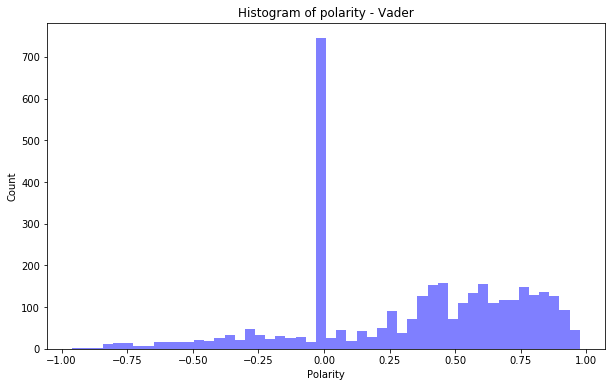

In [0]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_nort.compound_sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity - Vader')
plt.show();

In [0]:
test_0pol = df_nort[df_nort['compound_sentiment'] == 0]
## Check Polarity 0 tweets - Why is this so?
test_0pol[7:10]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized,polarity,negative,neutral,positive,compound_sentiment
37,1215337070283108352,1215337070283108352,1578593912000,2020-01-09,2020-01-09 19:18:32,CET,1161413762,no1farmerguy,Guy Eckley,NaN,Can’t do this in a car!\nSafe journey home @patlynn78 @FarmingGeorge & anyone else leaving #ORFC...,"['patlynn78', 'farminggeorge']",[],['https://pbs.twimg.com/media/EN2-no0WsAIp736.jpg'],3,0,17,[#ORFC20],[],https://twitter.com/No1FarmerGuy/status/1215337070283108352,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1161413762', 'username': 'No1FarmerGuy'}, {'user_id': '258021505', 'username': 'pa...",NaN,NaN,NaN,NaN,0,2020,1,9,19,18,32,cant do this in a carsafe journey home patlynn78 farminggeorge anyone else leaving orfc20 see yo...,Can’t do this in a car!Safe journey home @patlynn78 @FarmingGeorge & anyone else leaving #ORFC20...,"[cant, do, this, in, a, carsafe, journey, home, patlynn78, farminggeorge, anyone, else, leaving,...",20,cant carsafe journey home patlynn78 farminggeorge anyone else leaving orfc20 see next year pictw...,"[cant, carsafe, journey, home, patlynn78, farminggeorge, anyone, else, leaving, orfc20, see, nex...","[cant, carsafe, journey, home, patlynn78, farminggeorge, anyone, else, leaving, orfc20, see, nex...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.0,0.0,0.0
52,1215326074877419521,1215326072977395718,1578591290000,2020-01-09,2020-01-09 18:34:50,CET,1200443697348907008,xr_rebelradio,XR 📻 Rebel Radio,NaN,#futurevisioning #livingwithhope #regenerativefarming #farming #organic #food #organicfarming #f...,[],[],[],1,0,0,"[#futurevisioning, #livingwithhope, #regenerativefarming, #farming, #organic, #food, #organicfar...",[],https://twitter.com/xr_rebelradio/status/1215326074877419521,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1200443697348907008', 'username': 'xr_rebelradio'}]",NaN,NaN,NaN,NaN,0,2020,1,9,18,34,50,futurevisioning livingwithhope regenerativefarming farming organic food organicfarming farmingfo...,#futurevisioning #livingwithhope #regenerativefarming #farming #organic #food #organicfarming #f...,"[futurevisioning, livingwithhope, regenerativefarming, farming, organic, food, organicfarming, f...",16,futurevisioning livingwithhope regenerativefarming farming organic food organicfarming farmingfo...,"[futurevisioning, livingwithhope, regenerativefarming, farming, organic, food, organicfarming, f...","[futurevisioning, livingwithhope, regenerativefarming, farming, organic, food, organicfarming, f...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.0,0.0,0.0
57,1215317020415270914,1215317020415270914,1578589131000,2020-01-09,2020-01-09 17:58:51,CET,97423617,nourishscotland,Nourish Scotland,NaN,On our way home from a people and idea packed #ORFC20 pic.twitter.com/b1ScjHueb6,[],[],['https://pbs.twimg.com/media/EN2sYGeXUAIi12d.jpg'],1,0,4,[#ORFC20],[],https://twitter.com/nourishscotland/status/1215317020415270914,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '97423617', 'username': 'nourishscotland'}]",NaN,NaN,NaN,NaN,0,2020,1,9,17,58,51,on our way home from a people and idea packed orfc20 pictwittercomb1scjhueb6,On our way home from a people and idea packed #ORFC20 pic.twitter.com/b1ScjHueb6,"[on, our, way, home, from, a, people, and, idea, packed, orfc20, pictwittercomb1scjhueb6]",12,way home people idea packed orfc20 pictwittercomb1scjhueb6,"[way, home, people, idea, packed, orfc20, pictwittercomb1scjhueb6]","[way, home, people, idea, packed, orfc20, pictwittercomb1scjhueb6]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.0,0.0,0.0


In [0]:
positive_sentiment = df_nort[df_nort.compound_sentiment >= 0.9]
negative_sentiment = df_nort[df_nort.compound_sentiment <= -0.5]

print(positive_sentiment.shape, negative_sentiment.shape)

(126, 53) (124, 53)


#### Overview Negative Sentiment

In [0]:
neg = negative_sentiment[['date','time','username','tweet','compound_sentiment', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]
neg = neg.sort_values('compound_sentiment')
neg = neg.reset_index()
neg.tweet.head()

0    Penniman: people of colour in this country have persistent poverty. Much of our agriculture is d...
1    @HenryDimbleby makes the point @oxfordfarming that people died before smoking in restaurants was...
2    Defra Secretary Theresa Villiers defends largest destruction of protected species in living memo...
3    ... I'm down at #ORFC20 but I'll let you know what you miss\n (by the way there is a restaurant ...
4    What is racism? @navaratnampart1 asks the audience here at #OFC20. Can a name be racist? What ab...
Name: tweet, dtype: object

#### Overview Positive Sentiment

In [0]:
pos = positive_sentiment[['date','time','username','tweet','compound_sentiment', 'replies_count', 'retweets_count', 'likes_count', 'hashtags']]
pos = pos.sort_values('compound_sentiment')
pos = pos.reset_index()
pos.tweet.head()

0    ‘You must treat the earth like a relative and not like a commodity. We should engage our souls w...
1    Great presentation #ORFC20 Hope Valley Cluster Farmer Group pooling their resources to protect w...
2    Really looking forward to getting to #ORFC20 later on today.  Never fails to be an inspirational...
3    Seated yoga session, unexpected but surprisingly enlightening!! Thanks @matthewnaylor for pushin...
4    In order to challenge this we need a system approach to build protein production in the UK. Grow...
Name: tweet, dtype: object

#### Sentiment Analysis 
- Groupby Day
- Groupby Top Most Twitter

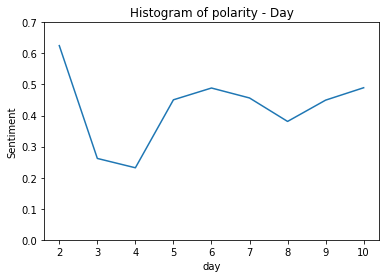

In [0]:
# Remove Null Polarity - Not possible to calculate !
sentiment_day_nonull = df_nort[df_nort['compound_sentiment']!=0]
sentiment_day_nonull = pd.DataFrame(sentiment_day_nonull.groupby('day').mean()['compound_sentiment']).reset_index()

#num_bins = 50
plt.figure(figsize=(6,4))
plt.plot(sentiment_day_nonull.day,sentiment_day_nonull.compound_sentiment)
plt.xlabel('day')
plt.ylabel('Sentiment')
plt.title('Histogram of polarity - Day')
plt.ylim(0,0.7)
plt.show();

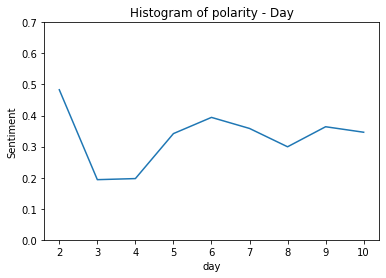

In [0]:
# With Polarity is null
sentiment_day = pd.DataFrame(df_nort.groupby('day').mean()['compound_sentiment']).reset_index()

#num_bins = 50
plt.figure(figsize=(6,4))
plt.plot(sentiment_day.day,sentiment_day.compound_sentiment)
plt.xlabel('day')
plt.ylabel('Sentiment')
plt.title('Histogram of polarity - Day')
plt.ylim(0,0.7)
plt.show();

In [0]:
user_sent = pd.DataFrame(df_nort.groupby('username').mean()['compound_sentiment']).reset_index().sort_values('compound_sentiment',ascending=False)
user_sent[0:2]

,username,compound_sentiment
372,headysfarm,0.9509
412,irishzoologist,0.9497


In [0]:
user_sent = pd.DataFrame(df_nort.groupby('username').mean()['compound_sentiment']).reset_index().sort_values('compound_sentiment',ascending=True)
user_sent[0:2]

,username,compound_sentiment
776,terrytuf1,-0.8271
317,fmdelac,-0.8020


In [0]:
df_nort.to_csv(root_path+'ofc_data_nort_sentiment.csv')

### Automated Keywords Extraction

In [0]:
# https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [154]:
#Fetch wordcount for each abstract
data_nort['word_count'] = data_nort['tweet'].apply(lambda x: len(str(x).split(" ")))
data_nort[['tweet','word_count']].head(2)

,tweet,word_count
391,🇨🇭👏 @SuzanneGard special blog https://m.facebook.com/sportfisioswiss/ … ⛷🏂 ⛸🥌🏒@lausanne2020 @yo...,13
392,Community Proud !,3


In [155]:
##Descriptive statistics of word counts
data_nort.word_count.describe()

count    10227.000000
mean        20.378117
std         12.332598
min          1.000000
25%         10.000000
50%         19.000000
75%         29.000000
max         58.000000
Name: word_count, dtype: float64

In [157]:
#Identify common words
freq = pd.Series(' '.join(data_nort['tweet']).split()).value_counts()[:5]
freq

the              4502
#Lausanne2020    4413
de               3619
a                2183
in               1940
dtype: int64

In [158]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data_nort['tweet']).split()).value_counts()[-5:]
freq1

срама...                      1
pic.twitter.com/MqLl3YI4Fx    1
much😭😭..i                     1
domenica                      1
PARTICIPATE                   1
dtype: int64

In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()

# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [0]:
# create a corpus of all the text which does not have stop words in it - this corupus will be a list of lists
corpus = list(data_nort['noStopWords'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,min_df=0.05,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [162]:
list(cv.vocabulary_.keys())[:10]

['lausanne2020',
 'youtholympics',
 'lausanne2020 youtholympics',
 'lausanne',
 'en',
 'la',
 'de',
 'olympic',
 'gold',
 'team']

[Text(0, 0, 'lausanne2020'),
 Text(0, 0, 'de'),
 Text(0, 0, 'youtholympics'),
 Text(0, 0, 'la'),
 Text(0, 0, 'en'),
 Text(0, 0, 'que'),
 Text(0, 0, 'el'),
 Text(0, 0, 'team'),
 Text(0, 0, 'olympic'),
 Text(0, 0, 'los'),
 Text(0, 0, 'youtholympicgames'),
 Text(0, 0, 'youth'),
 Text(0, 0, 'lausanne'),
 Text(0, 0, 'olympics'),
 Text(0, 0, 'le'),
 Text(0, 0, 'hockey'),
 Text(0, 0, 'gold'),
 Text(0, 0, 'les'),
 Text(0, 0, 'medal'),
 Text(0, 0, 'un')]

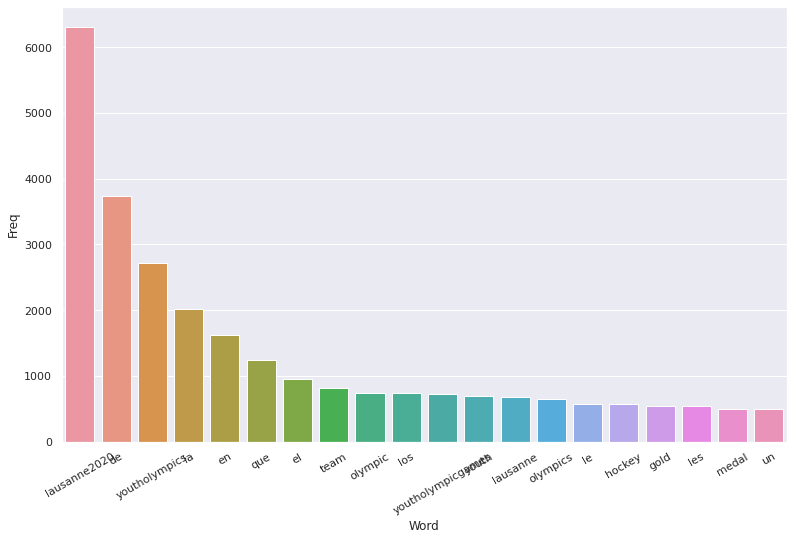

In [163]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                       Bi-gram  Freq
0   lausanne2020 youtholympics  1136
1                        de la   640
2   youtholympics lausanne2020   429
3                youth olympic   362
4                olympic games   288
5                  de invierno   209
6               youth olympics   205
7                 winter youth   190
8                  olmpicos de   189
9              juegos olmpicos   188
10                 la juventud   186
11                       en la   182
12                  ice hockey   175
13             de lausanne2020   164
14                       en el   163
15                  los juegos   163
16                      de los   163
17   lausanne2020 lausanne2020   154
18                  gold medal   154
19                 la jeunesse   149


[Text(0, 0, 'lausanne2020 youtholympics'),
 Text(0, 0, 'de la'),
 Text(0, 0, 'youtholympics lausanne2020'),
 Text(0, 0, 'youth olympic'),
 Text(0, 0, 'olympic games'),
 Text(0, 0, 'de invierno'),
 Text(0, 0, 'youth olympics'),
 Text(0, 0, 'winter youth'),
 Text(0, 0, 'olmpicos de'),
 Text(0, 0, 'juegos olmpicos'),
 Text(0, 0, 'la juventud'),
 Text(0, 0, 'en la'),
 Text(0, 0, 'ice hockey'),
 Text(0, 0, 'de lausanne2020'),
 Text(0, 0, 'en el'),
 Text(0, 0, 'los juegos'),
 Text(0, 0, 'de los'),
 Text(0, 0, 'lausanne2020 lausanne2020'),
 Text(0, 0, 'gold medal'),
 Text(0, 0, 'la jeunesse')]

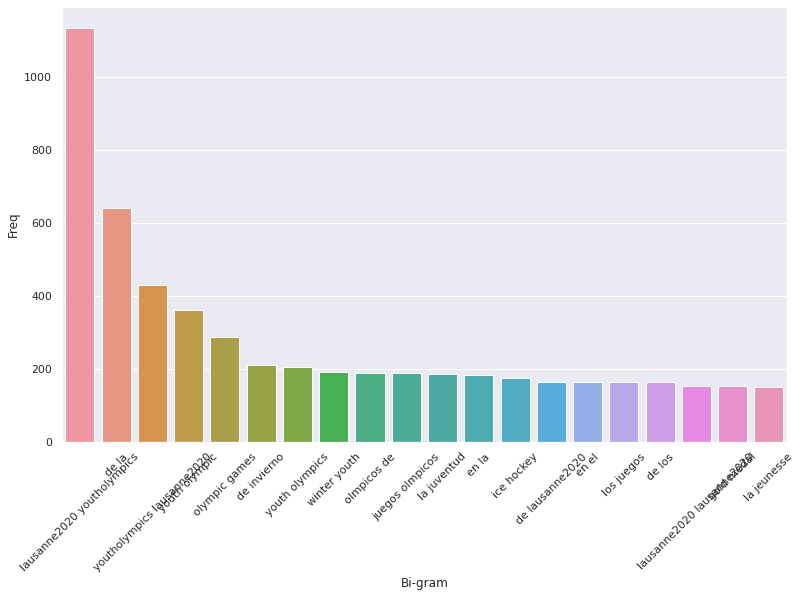

In [164]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                        Tri-gram  Freq
0                            youth olympic games   246
1                                 de la juventud   184
2                             juegos olmpicos de   174
3                                 de la jeunesse   146
4                            los juegos olmpicos   142
5                             jeux olympiques de   124
6                                 la juventud de   123
7                           winter youth olympic   121
8                               olympiques de la   121
9                                 olmpicos de la   112
10                          juventud de invierno   108
11           youtholympicgames yog figurescating    97
12  lausanne2020 youtholympics youtholympicgames    91
13                          olmpicos de invierno    64
14                             short track speed    62
15                                 en los juegos    62
16         lausanne2020 youtholympics iihfhockey    60
17        

[Text(0, 0, 'youth olympic games'),
 Text(0, 0, 'de la juventud'),
 Text(0, 0, 'juegos olmpicos de'),
 Text(0, 0, 'de la jeunesse'),
 Text(0, 0, 'los juegos olmpicos'),
 Text(0, 0, 'jeux olympiques de'),
 Text(0, 0, 'la juventud de'),
 Text(0, 0, 'winter youth olympic'),
 Text(0, 0, 'olympiques de la'),
 Text(0, 0, 'olmpicos de la'),
 Text(0, 0, 'juventud de invierno'),
 Text(0, 0, 'youtholympicgames yog figurescating'),
 Text(0, 0, 'lausanne2020 youtholympics youtholympicgames'),
 Text(0, 0, 'olmpicos de invierno'),
 Text(0, 0, 'short track speed'),
 Text(0, 0, 'en los juegos'),
 Text(0, 0, 'lausanne2020 youtholympics iihfhockey'),
 Text(0, 0, 'mixed noc team'),
 Text(0, 0, 'track speed skating'),
 Text(0, 0, 'de invierno lausanne2020')]

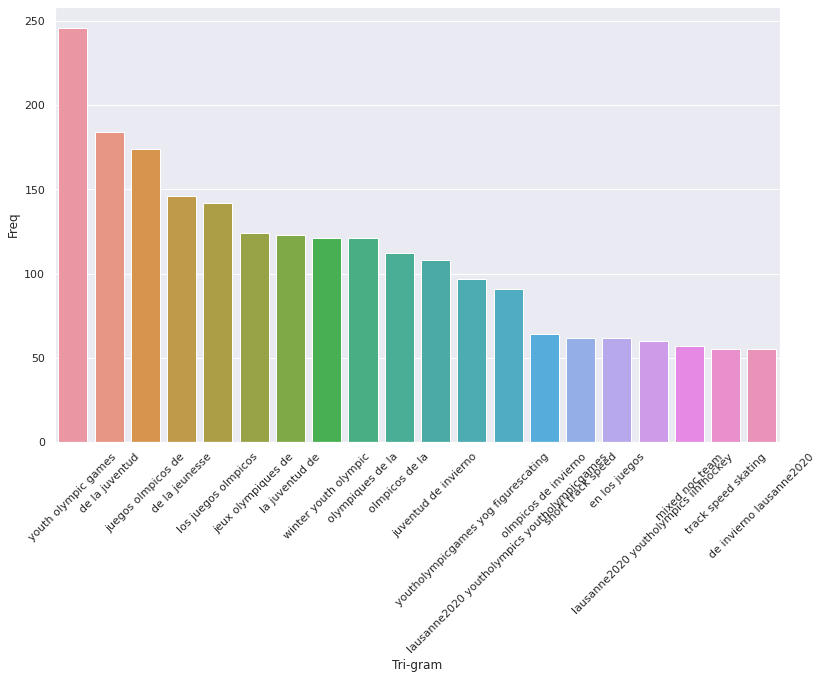

In [165]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

#### TF-IFDF Transformer

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]

doc = ' '.join(sentence)

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [0]:
doc[:200]

'orfc20 orfc farming ofc20 need oxford conference farming conference agriculture food farmers great us oxfordfarming session today ofc2020 uk oxford farming'

In [0]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# # now print the results
# print("\nAbstract:")
# print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Keywords:
farming 0.428
conference 0.356
oxford 0.353
today 0.22
agriculture 0.22


### Word2Vec

##### Calculation Steps

In [0]:
df_nort.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized
0,1215558628599570432,1215558628599570432,1578646735000,2020-01-10,2020-01-10 09:58:55,CET,506182510,dot_23_,Dot 23,NaN,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"['orfc', 'georgemonbiot']",['https://twitter.com/hjgardiner/status/1215286998505873408'],[],0,0,0,"[#ORFC20, #ORFC2020]",[],https://twitter.com/Dot_23_/status/1215558628599570432,False,https://twitter.com/HJGardiner/status/1215286998505873408,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '506182510', 'username': 'Dot_23_'}, {'user_id': '420227919', 'username': 'ORFC'}, ...",NaN,NaN,NaN,NaN,0,2020,1,10,9,58,55,if you wanna be my farmer if you couldnt hear our spice herd intervention you can download the s...,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"[if, you, wan, na, be, my, farmer, if, you, couldnt, hear, our, spice, herd, intervention, you, ...",25,wanna farmer couldnt hear spice herd intervention download song orfc20 orfc2020 orfc georgemonbiot,"[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg..."


In [0]:
# create a corpus of all the text which does not have stop words in it - this corupus will be a list of lists
corpus = list(df_nort['lemmatized'])

In [0]:
# # Install Gensim Library pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install --upgrade gensim

from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, 
                          size=100, 
                          window=10, 
                          min_count=35, 
                          workers=10)

In [0]:
#PCA
from sklearn.decomposition import PCA

vocab = list(model.wv.vocab)
X = model[model.wv.vocab]

pca = PCA(n_components = 2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


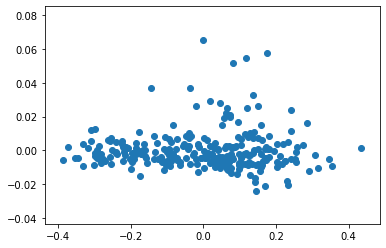

In [0]:
import matplotlib.pyplot as pyplot
pyplot.scatter(result[:, 0], result[:, 1])

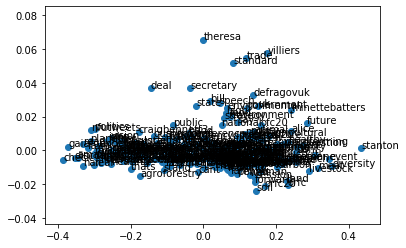

In [0]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i, 1]))
pyplot.show()

In [0]:
wrds = list(model.wv.vocab)
len(wrds)

270

In [0]:
#zip the two lists containing vectors and words
zipped = zip(model.wv.index2word, model.wv.vectors)

#the resulting list contains `(word, wordvector)` tuples. We can extract the entry for any `word` or `vector` (replace with the word/vector you're looking for) using a list comprehension:
wordresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]

In [0]:
# Look at the hashtags that are similar to pancakes!
w1 = 'ofc'
model.wv.most_similar(positive=w1,topn=20)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('key', 0.9997162818908691),
 ('practice', 0.9997149109840393),
 ('work', 0.9997093677520752),
 ('tree', 0.9997057914733887),
 ('opportunity', 0.9997010827064514),
 ('time', 0.9996894598007202),
 ('u', 0.9996892809867859),
 ('discussion', 0.9996882677078247),
 ('interesting', 0.9996813535690308),
 ('making', 0.9996813535690308),
 ('first', 0.999680757522583),
 ('know', 0.9996805191040039),
 ('tomorrow', 0.9996798038482666),
 ('sustainable', 0.999677300453186),
 ('morning', 0.9996771812438965),
 ('question', 0.9996771216392517),
 ('issue', 0.9996734261512756),
 ('best', 0.9996718764305115),
 ('including', 0.9996715188026428),
 ('part', 0.9996702075004578)]

#### Create Dataframe for target Words

In [0]:
target_words_list = ['orfc','ofc','agriculture','farming','livestock','climate','agroforestry','nature','agroecology','sustainable','health','biodiversity','soil','future','farmer']

In [0]:
#dataframe of similar words
word_frame = pd.DataFrame(result, index=vocab, columns=['x', 'y'])
word_frame.reset_index(inplace=True)
word_frame.columns = ['nearest_all_word', 'nearest_all_x', 'nearest_all_y']

In [0]:
def GetMostSimilar(target_word):

  #find most similar 
  most_similar = list(model.wv.most_similar(target_word,topn=20))
  most_similar = [ el[0] for el in most_similar ]
  most_similar.append(target_word)
  
  return most_similar

In [0]:
list_df = []
  
for word in target_words_list:
  
  # get most_similar
  most_similar = GetMostSimilar(word)
  
  # get the dataframe for the words
  nearest_df = word_frame[word_frame.nearest_all_word.isin(most_similar)]
  nearest_df.columns = ['nearest_'+str(word), 'nearest_x_'+str(word), 'nearest_y_'+str(word)]
  nearest_df = nearest_df.reset_index(drop=True)
  
  # append each df to list
  list_df.append(nearest_df)
  ## append dataframes in the list to one big dataframe
  final_df = pd.concat(list_df,axis=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#save it to csv file
final_df.to_csv(root_path+str('nearest_neighbours.csv'))
word_frame.to_csv(root_path+str('allwords_pca_whole.csv'))

In [0]:
final_df.head(10)

,nearest_orfc,nearest_x_orfc,nearest_y_orfc,nearest_ofc,nearest_x_ofc,nearest_y_ofc,nearest_agriculture,nearest_x_agriculture,nearest_y_agriculture,nearest_farming,nearest_x_farming,nearest_y_farming,nearest_livestock,nearest_x_livestock,nearest_y_livestock,nearest_climate,nearest_x_climate,nearest_y_climate,nearest_agroforestry,nearest_x_agroforestry,nearest_y_agroforestry,nearest_nature,nearest_x_nature,nearest_y_nature,nearest_agroecology,nearest_x_agroecology,nearest_y_agroecology,nearest_sustainable,nearest_x_sustainable,nearest_y_sustainable,nearest_health,nearest_x_health,nearest_y_health,nearest_biodiversity,nearest_x_biodiversity,nearest_y_biodiversity,nearest_soil,nearest_x_soil,nearest_y_soil,nearest_future,nearest_x_future,nearest_y_future,nearest_farmer,nearest_x_farmer,nearest_y_farmer
0,orfc20,0.169803,-0.021460,sustainable,0.072076,-0.007030,good,0.070492,0.002661,full,-0.220387,0.002070,sustainable,0.072076,-0.007030,farmer,0.225988,-0.006221,farmer,0.225988,-0.006221,farmer,0.225988,-0.006221,orfc,0.233211,-0.020698,sustainable,0.072076,-0.007030,dont,0.256625,-0.001125,orfc,0.233211,-0.020698,orfc2020,0.063291,-0.008833,hear,0.104621,0.006695,farmer,0.225988,-0.006221
1,orfc2020,0.063291,-0.008833,interesting,0.099621,-0.002234,dont,0.256625,-0.001125,sustainable,0.072076,-0.007030,working,-0.046637,-0.004549,dont,0.256625,-0.001125,georgemonbiot,-0.222093,-0.006479,working,-0.046637,-0.004549,working,-0.046637,-0.004549,dont,0.256625,-0.001125,much,0.211975,-0.003376,dont,0.256625,-0.001125,biodiversity,-0.091931,-0.009019,said,-0.039720,0.007440,dont,0.256625,-0.001125
2,orfc,0.233211,-0.020698,morning,0.177586,0.000832,working,-0.046637,-0.004549,farming,0.040377,-0.000038,much,0.211975,-0.003376,working,-0.046637,-0.004549,next,0.151686,-0.007941,climate,0.129120,-0.002940,opportunity,0.180784,0.000953,working,-0.046637,-0.004549,want,0.258883,0.001688,working,-0.046637,-0.004549,land,0.230549,-0.018445,ofc20,0.158759,0.014716,want,0.258883,0.001688
3,biodiversity,-0.091931,-0.009019,opportunity,0.180784,0.000953,want,0.258883,0.001688,want,0.258883,0.001688,lot,0.173403,-0.004808,climate,0.129120,-0.002940,year,0.155006,-0.009058,support,-0.100365,-0.000055,see,0.019869,-0.007491,want,0.258883,0.001688,show,-0.045061,0.002463,climate,0.129120,-0.002940,farm,0.076295,-0.013506,really,0.136756,-0.001508,opportunity,0.180784,0.000953
4,land,0.230549,-0.018445,time,0.164450,-0.006059,morning,0.177586,0.000832,thing,0.099152,-0.010993,farm,0.076295,-0.013506,biodiversity,-0.091931,-0.009019,opportunity,0.180784,0.000953,challenge,0.032907,0.004050,u,0.306559,-0.002702,thing,0.099152,-0.010993,talk,0.179910,-0.004107,biodiversity,-0.091931,-0.009019,well,0.127347,-0.014782,new,0.161036,0.006188,big,0.082442,-0.005310
5,research,0.226044,-0.006627,u,0.306559,-0.002702,agriculture,0.122016,0.007927,real,-0.301116,-0.008566,way,0.161052,-0.009009,want,0.258883,0.001688,see,0.019869,-0.007491,time,0.164450,-0.006059,change,0.194342,-0.000189,interesting,0.099621,-0.002234,big,0.082442,-0.005310,farm,0.076295,-0.013506,livestock,0.292347,-0.012319,future,0.285721,0.015881,time,0.164450,-0.006059
6,see,0.019869,-0.007491,work,0.159243,-0.002326,big,0.082442,-0.005310,morning,0.177586,0.000832,well,0.127347,-0.014782,need,0.157966,-0.009646,well,0.127347,-0.014782,use,0.220750,0.003895,work,0.159243,-0.002326,morning,0.177586,0.000832,meat,0.316864,-0.010330,talk,0.179910,-0.004107,better,0.124776,-0.007234,ofc2020,0.136982,0.007498,would,0.104973,0.002922
7,like,0.101274,-0.009235,know,0.115172,-0.007937,say,0.094901,0.016779,talk,0.179910,-0.004107,time,0.164450,-0.006059,show,-0.045061,0.002463,many,0.045402,-0.006815,livestock,0.292347,-0.012319,experience,-0.005815,-0.004664,opportunity,0.180784,0.000953,like,0.101274,-0.009235,like,0.101274,-0.009235,impact,0.057907,-0.007465,quality,-0.136367,0.008393,use,0.220750,0.003895
8,well,0.127347,-0.014782,first,0.004792,-0.003649,use,0.220750,0.003895,inspiring,-0.0

### Topic Modelling

#### Create Bigrams and Trigrams

In [0]:
df_nort.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized
0,1215558628599570432,1215558628599570432,1578646735000,2020-01-10,2020-01-10 09:58:55,CET,506182510,dot_23_,Dot 23,NaN,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"['orfc', 'georgemonbiot']",['https://twitter.com/hjgardiner/status/1215286998505873408'],[],0,0,0,"[#ORFC20, #ORFC2020]",[],https://twitter.com/Dot_23_/status/1215558628599570432,False,https://twitter.com/HJGardiner/status/1215286998505873408,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '506182510', 'username': 'Dot_23_'}, {'user_id': '420227919', 'username': 'ORFC'}, ...",NaN,NaN,NaN,NaN,0,2020,1,10,9,58,55,if you wanna be my farmer if you couldnt hear our spice herd intervention you can download the s...,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"[if, you, wan, na, be, my, farmer, if, you, couldnt, hear, our, spice, herd, intervention, you, ...",25,wanna farmer couldnt hear spice herd intervention download song orfc20 orfc2020 orfc georgemonbiot,"[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg..."


In [0]:
# select the text to create bigrams, trigrams
text_data =df_nort['token_textnoStop']

# Build the bigram and trigram models
bigram = Phrases(text_data, min_count=2) 
trigram = Phrases(bigram[text_data], min_count=2)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
new_bigram = []
new_trigram = []  


for i in bigram_mod[text_data]:  
  new_bigram.append(i)
for i in trigram_mod[bigram_mod[text_data]]:  
  new_trigram.append(i)

## save bigrams, trigrams into dataframe:
# bigrams
df_nort['bigrams'] = new_bigram
# trigrams
df_nort['trigrams'] = new_trigram

## Lemmatized bigrams and trigrams
df_nort['bigrams_lem'] = df_nort['bigrams'].apply(lambda lem: [lemmatizer.lemmatize(w) for w in lem]) 
df_nort['trigrams_lem'] = df_nort['trigrams'].apply(lambda lem: [lemmatizer.lemmatize(w) for w in lem]) 

In [0]:
df_nort.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,RT,year,month,day,hour,minute,second,clean_text,text_sentiment,token_text,token_count,noStopWords,token_textnoStop,lemmatized,bigrams,trigrams,bigrams_lem,trigrams_lem
0,1215558628599570432,1215558628599570432,1578646735000,2020-01-10,2020-01-10 09:58:55,CET,506182510,dot_23_,Dot 23,NaN,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"['orfc', 'georgemonbiot']",['https://twitter.com/hjgardiner/status/1215286998505873408'],[],0,0,0,"[#ORFC20, #ORFC2020]",[],https://twitter.com/Dot_23_/status/1215558628599570432,False,https://twitter.com/HJGardiner/status/1215286998505873408,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '506182510', 'username': 'Dot_23_'}, {'user_id': '420227919', 'username': 'ORFC'}, ...",NaN,NaN,NaN,NaN,0,2020,1,10,9,58,55,if you wanna be my farmer if you couldnt hear our spice herd intervention you can download the s...,“If you wanna be my farmer” - if you couldn’t hear our Spice Herd intervention you can download ...,"[if, you, wan, na, be, my, farmer, if, you, couldnt, hear, our, spice, herd, intervention, you, ...",25,wanna farmer couldnt hear spice herd intervention download song orfc20 orfc2020 orfc georgemonbiot,"[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg...","[farmer, couldnt, hear, spice, herd, intervention, download, song, orfc20, orfc2020, orfc, georg..."


#### Number of Topics - Coherence Functions

In [0]:
# create the dictionary
id2word = corpora.Dictionary(df_nort['bigrams_lem'])
# create corpus
texts = list(df_nort['bigrams_lem'])

# create the corpus (term document frequency)
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [0]:
## Compute coherence values 
## Use to determine the number of topic to define with the LDA Model
## Define Parameters with 20 Passes, Chunksize of 80

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                               id2word=dictionary, num_topics=num_topics, chunksize=60,
                                               #random_state=100, 
                                               update_every=1,passes=20,
                                               alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# Run the function Coherence Values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=10, limit=25, step=4)

In [0]:
for i in range(len(model_list)):
  print(model_list[i])
  print('Coherence Score: '+ str(coherence_values[i]))

LdaModel(num_terms=11293, num_topics=10, decay=0.5, chunksize=60)
Coherence Score: 0.4337909051565729
LdaModel(num_terms=11293, num_topics=14, decay=0.5, chunksize=60)
Coherence Score: 0.48534790453681975
LdaModel(num_terms=11293, num_topics=18, decay=0.5, chunksize=60)
Coherence Score: 0.5139467199197136
LdaModel(num_terms=11293, num_topics=22, decay=0.5, chunksize=60)
Coherence Score: 0.5181727611030523


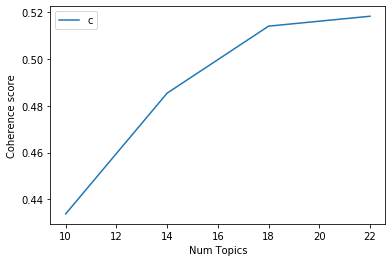

In [0]:
# Show graph 
limit=25; start=10; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

##### Gensim Model

In [0]:
 model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                               id2word=id2word, num_topics=16, chunksize=60,
                                               #random_state=100, 
                                               update_every=1,passes=20,
                                               alpha='auto', per_word_topics=True)

In [0]:
model.print_topics()

[(0,
  '0.148*"oxfordfarming" + 0.046*"minettebatters" + 0.025*"tomorrow" + 0.013*"politics_briefing" + 0.011*"ag" + 0.011*"defragovuk" + 0.011*"stanton" + 0.009*"set" + 0.008*"carbon" + 0.008*"word"'),
 (1,
  '0.026*"come" + 0.024*"challenge" + 0.021*"villiers" + 0.016*"welcome" + 0.014*"research" + 0.013*"end" + 0.013*"always" + 0.012*"diet" + 0.012*"panel" + 0.011*"keep"'),
 (2,
  '0.063*"say" + 0.046*"day" + 0.034*"well" + 0.025*"also" + 0.025*"interesting" + 0.024*"skill" + 0.019*"sustainable" + 0.017*"really" + 0.015*"land" + 0.014*"programme"'),
 (3,
  '0.033*"good" + 0.032*"u" + 0.030*"debate" + 0.026*"craigbennett3" + 0.025*"industry" + 0.021*"back" + 0.021*"speech" + 0.020*"people" + 0.018*"want" + 0.018*"look"'),
 (4,
  '0.039*"morning" + 0.034*"one" + 0.030*"change" + 0.030*"work" + 0.026*"story" + 0.022*"many" + 0.018*"must" + 0.017*"never" + 0.014*"attending" + 0.013*"free"'),
 (5,
  '0.056*"conference" + 0.024*"event" + 0.021*"matthewnaylor" + 0.020*"use" + 0.019*"openin

'drive/My Drive/Personal Projects/2020/ORFC2020/data/'

In [0]:
## Save single blogposts into a text file - Use in LDA Mallet
## Save Lemmatized 
for i in range(len(df_nort['bigrams_lem'])):
  with open(root_path+'mallet/'+str(i)+'.txt', 'w') as f:
    for item in df_nort['bigrams_lem'][i]:
      f.write("%s\n" % item)